# Loading the data

##### For our Consumer Sentiment Analysis Project we will analyse 'Womens Clothing E-Commerce Reviews' dataset. This is a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers.It would help us analyse woman's attitudes, feelings, and views towards a Clothing. We can utilise woman sentiment analysis here to decipher customer's experience with product and thus enhance the quality of their experience, and gain a competitive advantage.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [39]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [40]:
#Number of unique values
df.nunique()

Unnamed: 0                 23486
Clothing ID                 1206
Age                           77
Title                      13993
Review Text                22634
Rating                         5
Recommended IND                2
Positive Feedback Count       82
Division Name                  3
Department Name                6
Class Name                    20
dtype: int64

In [41]:
# Renaming columns

df.rename(columns={'Review Text':'Review', 
                   'Recommended IND':'Recommended', 
                   'Positive Feedback Count':'PositiveFeedback', 
                   'Division Name':'Division', 'Department Name':'Department', 
                   'Class Name':'Class'}, inplace=True)

# Checking for missing values

In [42]:
df.isnull().sum()/len(df)*100

Unnamed: 0           0.000000
Clothing ID          0.000000
Age                  0.000000
Title               16.222430
Review               3.597888
Rating               0.000000
Recommended          0.000000
PositiveFeedback     0.000000
Division             0.059610
Department           0.059610
Class                0.059610
dtype: float64

We won't be using Title feature since it has a lot of missing values.

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,23486.0,11742.500000,6779.968547,0.0,5871.25,11742.5,17613.75,23485.0
Clothing ID,23486.0,918.118709,203.298980,0.0,861.00,936.0,1078.00,1205.0
Age,23486.0,43.198544,12.279544,18.0,34.00,41.0,52.00,99.0
Rating,23486.0,4.196032,1.110031,1.0,4.00,5.0,5.00,5.0
Recommended,23486.0,0.822362,0.382216,0.0,1.00,1.0,1.00,1.0
PositiveFeedback,23486.0,2.535936,5.702202,0.0,0.00,1.0,3.00,122.0


In [44]:
df.drop(['Clothing ID', 'Title', 'Unnamed: 0'], axis = 1, inplace = True)

We will drop these attributes because they hold very less significance to sentiment analysis of the review.

In [45]:
df[df['Review'].isnull()]

,Age,Review,Rating,Recommended,PositiveFeedback,Division,Department,Class
92,23,NaN,5,1,0,General Petite,Tops,Knits
93,31,NaN,5,1,0,General,Dresses,Dresses
98,50,NaN,5,1,0,General,Jackets,Outerwear
135,35,NaN,4,1,0,General Petite,Tops,Knits
142,35,NaN,5,1,0,General,Jackets,Outerwear
...,...,...,...,...,...,...,...,...
23258,35,NaN,4,1,0,General,Tops,Knits
23301,52,NaN,5,1,0,General,Tops,Knits
23303,46,NaN,5,1,0,General,Tops,Blouses
23470,39,NaN,5,1,0,General Petite,Dresses,Dresses


Removing the unwanted null values.

In [46]:
df = df[~df['Review'].isnull()]

In [47]:
df.shape

(22641, 8)

# Data Analysis and Visualization

In [48]:
df.head()

,Age,Review,Rating,Recommended,PositiveFeedback,Division,Department,Class
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


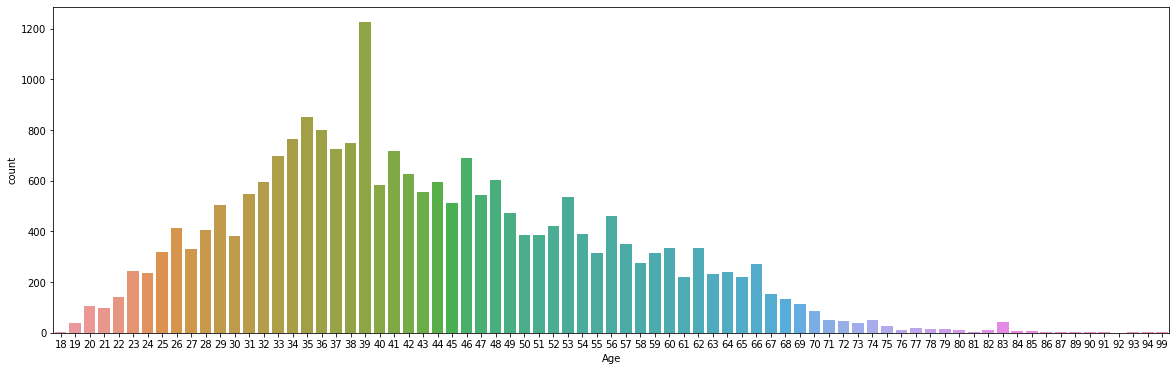

In [49]:
plt.figure(figsize = (20,6))
sns.countplot(x = 'Age', data = df)
plt.show()

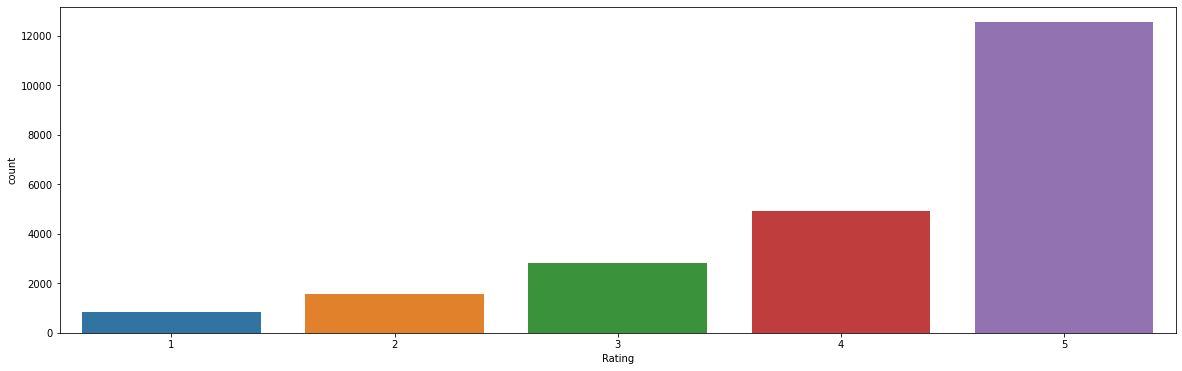

In [50]:
plt.figure(figsize = (20,6))
sns.countplot(x = 'Rating', data = df)
plt.show()

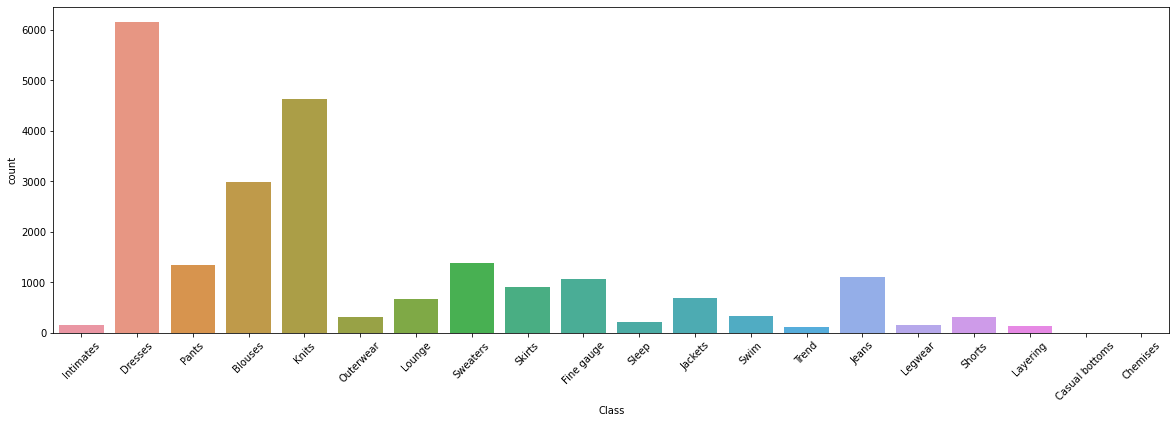

In [51]:
plt.figure(figsize = (20,6))
sns.countplot(x = 'Class', data = df)
plt.xticks(rotation = 45)
plt.show()

The bar chart above shows that Dresses, Knits and Blouses are bought the most by women. 

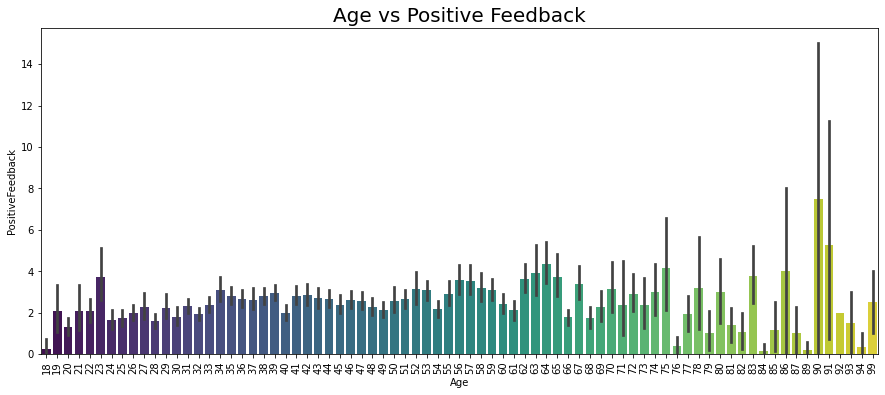

In [52]:
plt.figure(figsize = (15,6))
sns.barplot(x ='Age',y= 'PositiveFeedback',data = df, palette = 'viridis')
plt.title('Age vs Positive Feedback', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

From the Graph we conclude that There's no noteable relationship between Age and Positive Feedback, excluding some outliers.  



c:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



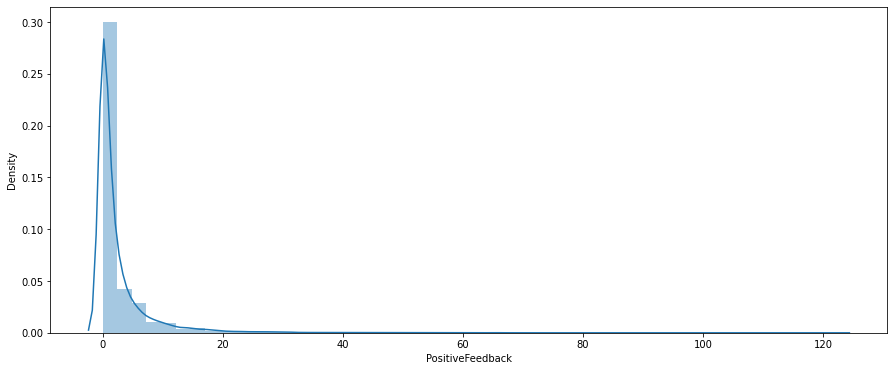

In [53]:
plt.figure(figsize = (15,6))
sns.distplot(df['PositiveFeedback'])
plt.show()

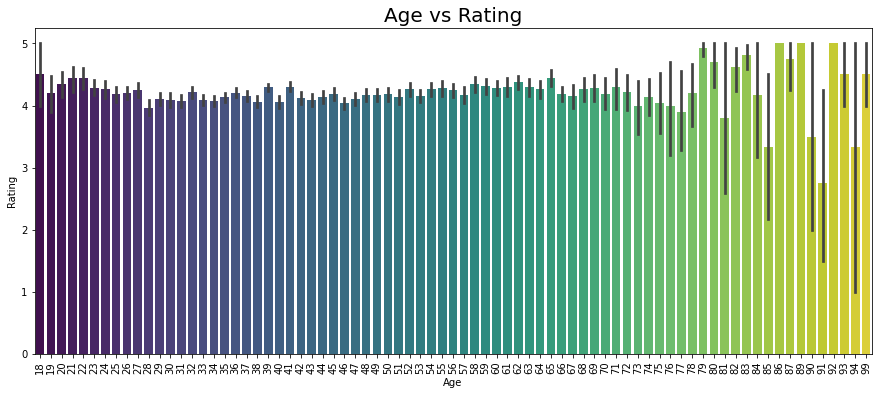

In [54]:
plt.figure(figsize = (15,6))

sns.barplot(x ='Age',y= 'Rating',data = df, palette = 'viridis')
plt.title('Age vs Rating', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

There's no noteable relation between Age and Rating, excluding some outliers. Same as Age vs Positive Feedback.

# Lets Clear the text for the visualization of polarity

Removing all the punctuations from the Review.

In [55]:
import string
string.punctuation
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
df['Review']=df['Review'].apply(lambda x: remove_punctuation(x))
df.head()

,Age,Review,Rating,Recommended,PositiveFeedback,Division,Department,Class
0,33,Absolutely wonderful silky and sexy and comfo...,4,1,0,Initmates,Intimate,Intimates
1,34,Love this dress its sooo pretty i happened t...,5,1,4,General,Dresses,Dresses
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,I love love love this jumpsuit its fun flirty ...,5,1,0,General Petite,Bottoms,Pants
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [56]:
!pip install TextBlob
from textblob import *

df['polarity'] = df['Review'].map(lambda text: TextBlob(text).sentiment.polarity)
df['polarity']

0        0.633333
1        0.318750
2        0.076392
3        0.500000
4        0.393750
           ...   
23481    0.512667
23482    0.091667
23483    0.414286
23484    0.316667
23485    0.364444
Name: polarity, Length: 22641, dtype: float64

In [57]:
import plotly.express as px
px.histogram(df, x = 'polarity',color="Rating", opacity = 0.5)

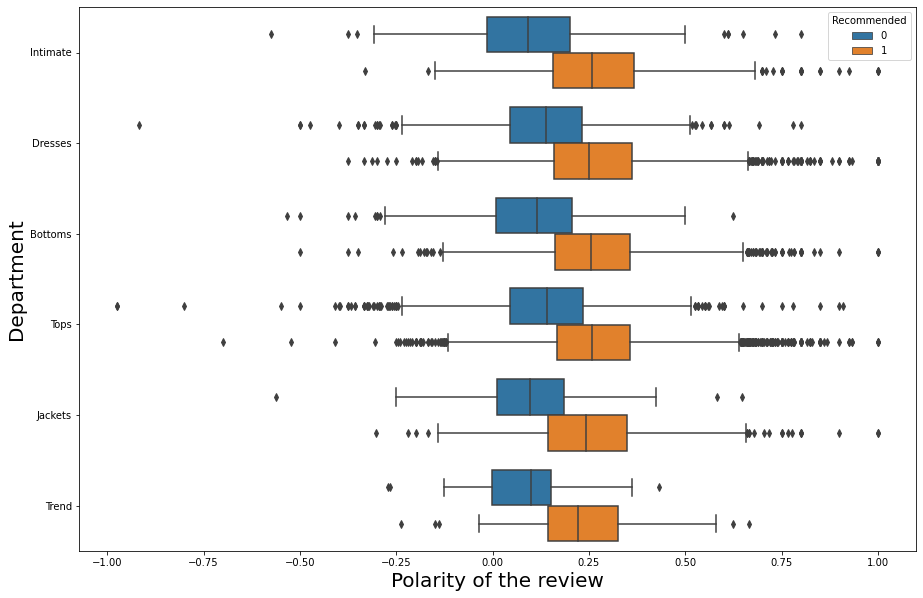

In [58]:
plt.figure(figsize = (15,10))
sns.boxplot(x="polarity", y="Department", hue = "Recommended", data = df)
plt.xlabel("Polarity of the review", fontsize = 20)
plt.ylabel("Department", fontsize = 20)

plt.show()

This plot clearly depicts that **the polarities of "not recommended" are less than that of polarities of the "recommended".**

# Reviews with positive polarity

In [59]:
example = df.loc[df.polarity == 1,['Review']].sample(3).values
for i in example:
    print(i[0])

So comfortableso versatileso perfect
Fits perfect
I ordered the orange color too these are perfect for throwing on over workout clothes and then running errands


# Reviews with neutral polarity

In [60]:
example = df.loc[df.polarity == 0.5,['Review']].sample(3).values
for i in example:
    print(i[0])

Ive been waiting for this to go on sale and just picked one up in store the details and style of this blouse do not disappoint since its billowy in nature a size smaller fits me perfectly
The shirt is cute but there is no way that the length posted on the website is correctits a crop top this was returned
Love this henely the laceup is cute the shirt is comfy so versatile beach coverup or over jeans


# Reviews with negative polarity

In [61]:
example = df.loc[df.polarity < 0,['Review']].sample(3).values
for i in example:
    print(i[0])

I purchased this blazer and its so comfortable it runs small i am usually a size 6 but had to get it in size 8 i will be getting a lot of use out of this blazer it can be worn professionally with skirt or solid color dress or casual with jeans the fabric so very soft almost like a sweatshirt
I loved the color and design until i tried it on in the store i am 55 with a slender build i tried my usual xs but couldnt manage to put this shirt on me without risking smear my makeup or scratch my face by the elastic band at the neckline the band is so small even fully stretched out i have a normal sized head just in case you wonder i gave up after wrestling with it i can only imagine how uncomfortable to wear something with a tight elastic band choking mefunny but not funny
As the other reviewer said the skirt had this weird bunching on both sides of the hipsit was ridiculous i dont know how anyone could wear itlooks like you had two little triangle things poking out from each hip im long and l

# Polarity Pie-Chart

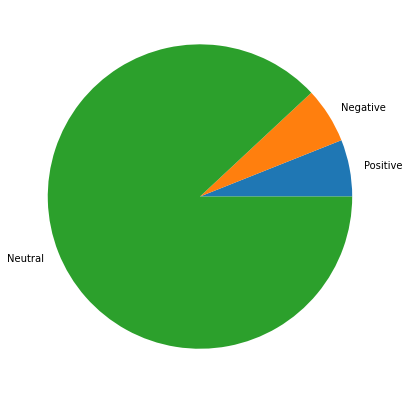

In [62]:
negative = (len(df.loc[df.polarity < 0, ['Review']].values)/len(df))*100
positive = (len(df.loc[df.polarity > 0.5, ['Review']].values)/len(df))*100
neutral = len(df.loc[df.polarity >0 ,['Review']].values) - len(df.loc[df.polarity >0.5 ,['Review']].values)
neutral = neutral/len(df)*100
plt.figure(figsize =(10, 7)) 
plt.pie([positive,negative,neutral], labels = ['Positive','Negative','Neutral']) 
plt.show()

# Create N-grams

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
def top_n_ngram(corpus,n = None,ngram = 1):
    vec = CountVectorizer(stop_words = 'english',ngram_range=(ngram,ngram)).fit(corpus)
    bag_of_words = vec.transform(corpus) #Have the count of  all the words for each review
    sum_words = bag_of_words.sum(axis =0) #Calculates the count of all the word in the whole review
    words_freq = [(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq,key = lambda x:x[1],reverse = True)
    return words_freq[:n]

#  Top 10 Unigrams

<AxesSubplot:title={'center':'Top 10 unigrams in review after removing stop words'}, xlabel='ReviewText'>

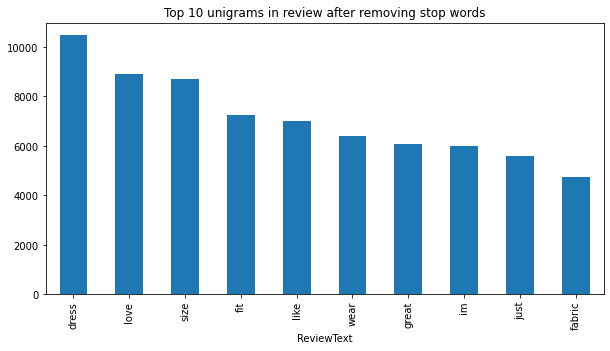

In [64]:
common_words= top_n_ngram(df['Review'], 10,1)
data = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
plt.figure(figsize =(10,5))
data.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
kind='bar', title='Top 10 unigrams in review after removing stop words')

# Top 20 Bigrams

<AxesSubplot:title={'center':'Top 10 unigrams in review after removing stop words'}, xlabel='ReviewText'>

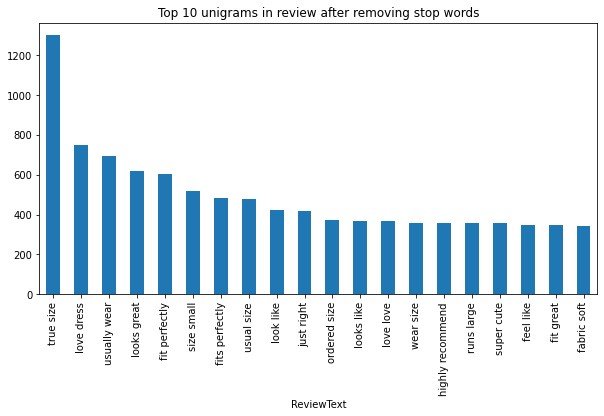

In [65]:
common_words = top_n_ngram(df['Review'], 20,2)
data = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
plt.figure(figsize =(10,5))
data.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
kind='bar', title='Top 10 unigrams in review after removing stop words')

# Visualizing Top 10 POS Tagging

<AxesSubplot:title={'center':'Top 20 Part-of-speech taggings'}>

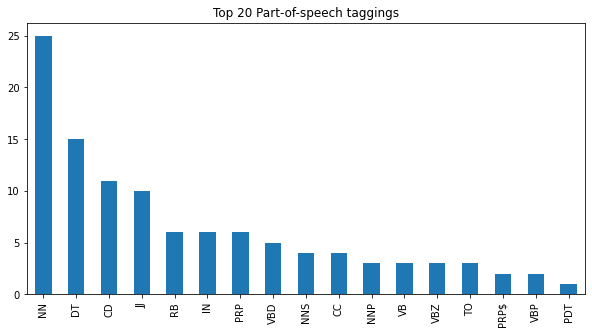

In [66]:
blob= TextBlob(str(df['Review']))
pos = pd.DataFrame(blob.tags,columns =['word','pos'])
pos1 = pos.pos.value_counts()[:20]
plt.figure(figsize = (10,5))
pos1.plot(kind='bar',title ='Top 20 Part-of-speech taggings')


In [67]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

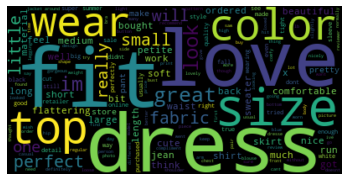

In [68]:
# Wordcloud of Review in Recommended product
from wordcloud import WordCloud
# Cleaned dataframe of Recommended
df_true = df[df.Recommended == 1]

text_true = " ".join(txt for txt in df_true['Review'])

text_cloud = WordCloud(collocations=False, background_color='black').generate(text_true)
plt.axis("off")
plt.imshow(text_cloud, interpolation='bilinear')

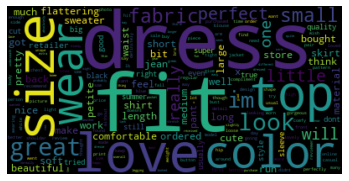

In [69]:
# Wordcloud of Review in not Recommended product

# Cleaned dataframe of Recommended
df_false = df[df.Recommended == 0]

text_true = " ".join(txt for txt in df_true['Review'])

text_cloud = WordCloud(collocations=False, background_color='black').generate(text_true)
plt.axis("off")
plt.imshow(text_cloud, interpolation='bilinear')

# Correlation of fetaures using Heatmaps 

Adding Review Length as a feature

In [70]:
df['review_len'] = df['Review'].astype(str).apply(len)

In [71]:
y = df['Recommended']
X = df.drop(columns = 'Recommended')

<AxesSubplot:>

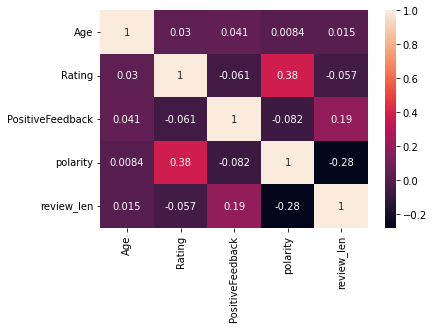

In [72]:
sns.heatmap(X.corr(), annot = True )

There's not a strong correleation between any of the features.

# Statistical Description

In [73]:
class1 = []
for i in X.polarity:
    if float(i)>=0.0:
        class1.append(1)
        
    elif float(i)<0.0:
        class1.append(0)
X['sentiment'] = class1

X.groupby(X['sentiment']).describe().T

sentiment                          0             1
Age              count  1.333000e+03  21308.000000
                 mean   4.336234e+01     43.275249
                 std    1.208516e+01     12.342210
                 min    2.000000e+01     18.000000
                 25%    3.500000e+01     34.000000
                 50%    4.100000e+01     41.000000
                 75%    5.100000e+01     52.000000
                 max    9.400000e+01     99.000000
Rating           count  1.333000e+03  21308.000000
                 mean   2.957989e+00      4.260231
                 std    1.355571e+00      1.052657
                 min    1.000000e+00      1.000000
                 25%    2.000000e+00      4.000000
                 50%    3.000000e+00      5.000000
                 75%    4.000000e+00      5.000000
                 max    5.000000e+00      5.000000
PositiveFeedback count  1.333000e+03  21308.000000
                 mean   3.159790e+00      2.597475
                 std    6.813857e+00      5.714293
                 min    0.000000e+00      0.000000
                 25%    0.000000e+00      0.000000
                 50%    1.000000e+00      1.000000
                 75%    3.000000e+00      3.000000
                 max    1.080000e+02    122.000000
polarity         count  1.333000e+03  21308.000000
                 mean  -9.206169e-02      0.262345
                 std    1.019496e-01      0.150223
                 min   -9.750000e-01      0.000000
                 25%   -1.233333e-01      0.154970
                 50%   -6.071429e-02      0.245000
                 75%   -2.687075e-02      0.349038
                 max   -1.734723e-18      1.000000
review_len       count  1.333000e+03  21308.000000
                 mean   2.878785e+02    299.257227
                 std    1.376986e+02    139.672532
                 min    1.000000e+01      9.000000
                 25%    1.710000e+02    180.000000
                 50%    2.760000e+02    293.000000
                 75%    4.150000e+02    445.000000
                 max    4.960000e+02    498.000000

# Creating Bag Of Words Model

In [74]:
print("Shape of X: " , X.shape)
print("Shape of y: " , y.shape)

Shape of X:  (22641, 10)
Shape of y:  (22641,)


In [75]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [76]:
X.index = np.arange(len(X))
corpus = []
from tqdm import tqdm
for i in tqdm(range(len(X))):
  review = re.sub('[^a-zA-Z]', ' ', X['Review'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

100%|██████████| 22641/22641 [00:24<00:00, 913.05it/s] 


In [78]:
from sklearn.feature_extraction.text import CountVectorizer as CV
cv  = CV(max_features = 3000,ngram_range=(1,1))
X_cv = cv.fit_transform(corpus).toarray()
y = y.values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cv, y, test_size = 0.20, random_state = 0)
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn import metrics
acc = accuracy_score(y_test, y_pred)
print("Accuracy of the classifier: ",acc)
print("Confusion matrix is :\n",metrics.confusion_matrix(y_test,y_pred))
print("Classification report: \n" ,metrics.classification_report(y_test,y_pred))


Accuracy of the classifier:  0.8728196069772577
Confusion matrix is :
 [[ 631  246]
 [ 330 3322]]
Classification report: 
               precision    recall  f1-score   support

           0       0.66      0.72      0.69       877
           1       0.93      0.91      0.92      3652

    accuracy                           0.87      4529
   macro avg       0.79      0.81      0.80      4529
weighted avg       0.88      0.87      0.87      4529



In [79]:
acc

0.8728196069772577

An accuracy score of 87.28% is procured from Bag of Words Technique

# TF-IDF Technique

Term Frequency - Inverse Document Frequency is used here to obtain the originality of a word. It transforms sentences to vectors(after tokenization, stemming/lemmatization). 

Bag of Words technique doesn't provide us with the semantic meaning of the word, here TF-IDF comes in play as it provides us the semantic meaning of the word.


In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer as TV
tv  = TV(ngram_range =(1,1),max_features = 3000)
X_tv = tv.fit_transform(corpus).toarray()

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_tv, y, test_size = 0.20, random_state = 0)
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [82]:
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)

In [83]:
acc

0.8355045263855155

An accuracy of 83.55% from the TF-IDF technique, which is less than that of Bag of Words Technique.

# Deep Learning Model

In [84]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [85]:
tokenizer = Tokenizer(num_words = 3000)
tokenizer.fit_on_texts(corpus)

In [86]:
sequences = tokenizer.texts_to_sequences(corpus)
padded = pad_sequences(sequences, padding='post')

In [87]:
word_index = tokenizer.word_index
count = 0
for i,j in word_index.items():
    if count == 11:
        break
    print(i,j)
    count = count+1

dress 1
love 2
fit 3
size 4
not 5
look 6
top 7
wear 8
like 9
color 10
great 11


These are the Top 11 most frequent words.

In [88]:
embedding_dim = 64
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(3000, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          192000    
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 6)                 390       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 192,397
Trainable params: 192,397
Non-trainable params: 0
_________________________________________________________________


In [89]:
num_epochs = 10

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [90]:
model.fit(padded,y,epochs= num_epochs)

Epoch 1/10
708/708 [==============================] - 3s 4ms/step - loss: 0.4241 - accuracy: 0.8253
Epoch 2/10
708/708 [==============================] - 4s 5ms/step - loss: 0.2606 - accuracy: 0.8877
Epoch 3/10
708/708 [==============================] - 3s 5ms/step - loss: 0.2334 - accuracy: 0.9012
Epoch 4/10
708/708 [==============================] - 4s 5ms/step - loss: 0.2206 - accuracy: 0.9082
Epoch 5/10
708/708 [==============================] - 3s 4ms/step - loss: 0.2104 - accuracy: 0.9127
Epoch 6/10
708/708 [==============================] - 3s 4ms/step - loss: 0.2024 - accuracy: 0.9154
Epoch 7/10
708/708 [==============================] - 3s 4ms/step - loss: 0.1955 - accuracy: 0.9197
Epoch 8/10
708/708 [==============================] - 3s 4ms/step - loss: 0.1896 - accuracy: 0.9221
Epoch 9/10
708/708 [==============================] - 3s 4ms/step - loss: 0.1836 - accuracy: 0.9258
Epoch 10/10
708/708 [==============================] - 3s 4ms/step - loss: 0.1780 - accuracy: 0.9274

In [109]:
sample_string = "I love the dress and has great color"
sample = tokenizer.texts_to_sequences(sample_string)
padded_sample = pad_sequences(sample, padding='post')

In [110]:
padded_sample.T

array([[   0,    0,  350,    0,  690, 1605,    0,    0, 1550, 1605,    0,
           0, 1380, 1605,    0,    0,    0,    0, 1465,    0,    0, 1550,
           0,    0,    0, 1234, 1380, 1605,    0,    0,    0,  271,    0,
         350,    0, 1380]])

In [111]:
model.predict(padded_sample.T)

1/1 [==============================] - 0s 35ms/step


array([[0.95883405]], dtype=float32)

We achieve an accuracy of  95.88% accuracy. Hence we can say with confidence that the review: "I love the dress and has great color" will result in recommendation.